# Project: Wrangling and Analyze Data

## Data Gathering

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [3]:
import pandas as pd
import numpy as np

In [4]:
# load twiter_archive_enhanced into a dataframe
twitter_archive_enhanced =pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [5]:
import requests
import os

In [6]:
# download image_predictions.csv from the udacity classrom
response =requests.get('https://video.udacity-data.com/topher/2018/November/5bf60fe7_image-predictions/image-predictions.tsv')

In [7]:
# save the image-predictions gotten from request to udacity classroom

with open(os.path.join(os.getcwd(), 'image_predictions.tsv'), mode = 'wb') as file:
            file.write(response.content)

In [8]:
# create dataframe to hold the image_predictions
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

In [9]:
# load first 2 images of image_predictions dataframe
image_predictions.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [12]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = twitter_archive_enhanced.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [13]:
import json

data = []
with open('tweet-json.txt') as f:
    for line in f:
        data.append(json.loads(line))

In [14]:
tweets=pd.DataFrame(data)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [15]:
twitter_archive_enhanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [16]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [17]:
tweets

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,False,False,en,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,False,False,en,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,False,False,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,Mon Nov 16 00:24:50 +0000 2015,666049248165822465,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,False,False,en,NaN,NaN,NaN,NaN
2350,Mon Nov 16 00:04:52 +0000 2015,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,False,False,en,NaN,NaN,NaN,NaN
2351,Sun Nov 15 23:21:54 +0000 2015,666033412701032449,666033412701032449,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,False,False,en,NaN,NaN,NaN,NaN
2352,Sun Nov 15 23:05:30 +0000 2015,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,False,False,en,NaN,NaN,NaN,NaN


In [18]:
twitter_archive_enhanced.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [19]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2354 non-null   object 
 1   id                             2354 non-null   int64  
 2   id_str                         2354 non-null   object 
 3   full_text                      2354 non-null   object 
 4   truncated                      2354 non-null   bool   
 5   display_text_range             2354 non-null   object 
 6   entities                       2354 non-null   object 
 7   extended_entities              2073 non-null   object 
 8   source                         2354 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     object 
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     o

In [20]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
twitter_archive_enhanced.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [22]:
tweets.dtypes

created_at                        object
id                                 int64
id_str                            object
full_text                         object
truncated                           bool
display_text_range                object
entities                          object
extended_entities                 object
source                            object
in_reply_to_status_id            float64
in_reply_to_status_id_str         object
in_reply_to_user_id              float64
in_reply_to_user_id_str           object
in_reply_to_screen_name           object
user                              object
geo                               object
coordinates                       object
place                             object
contributors                      object
is_quote_status                     bool
retweet_count                      int64
favorite_count                     int64
favorited                           bool
retweeted                           bool
possibly_sensiti

In [23]:
all_columns = pd.Series(list(twitter_archive_enhanced) + list(image_predictions) + list(tweets))
all_columns[all_columns.duplicated()]

17                 tweet_id
37                   source
38    in_reply_to_status_id
40      in_reply_to_user_id
dtype: object

In [24]:
twitter_archive_enhanced.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [25]:
twitter_archive_enhanced[twitter_archive_enhanced['tweet_id']==666029285002620928]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [26]:
type(twitter_archive_enhanced.timestamp[1])

str

In [27]:
twitter_archive_enhanced[twitter_archive_enhanced['tweet_id']==image_predictions['tweet_id'][6]]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None


In [28]:
(tweets.entities[1], tweets.extended_entities[1])

({'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892177413194625024,
    'id_str': '892177413194625024',
    'indices': [139, 162],
    'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg',
    'url': 'https://t.co/0Xxu71qeIV',
    'display_url': 'pic.twitter.com/0Xxu71qeIV',
    'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1',
    'type': 'photo',
    'sizes': {'large': {'w': 1407, 'h': 1600, 'resize': 'fit'},
     'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'small': {'w': 598, 'h': 680, 'resize': 'fit'},
     'medium': {'w': 1055, 'h': 1200, 'resize': 'fit'}}}]},
 {'media': [{'id': 892177413194625024,
    'id_str': '892177413194625024',
    'indices': [139, 162],
    'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg',
    'url': 'http

### Quality issues

###### twitter_archive_enhanced
1. not all are dog ratings and some are retweets replies.
2. missing attributes contained in image_predictions

3. timestamp has a type string not a Date type 

4. rating_numerator is of type int instead of float and wrongly extracted

5. english verbs and None for null names in name column

##### tweets

6. user column contains the same information about the author WeRateDogs™ (author)
7. extended_entities contains information already in enitities
8. id and id_str represent same information tweet_id
8. in_reply_to_status_id_str , in_reply_to_user_id_str, quoted_status_id_str and  possibly_sensitive_appealable denote data already in the data set except for the datatype in the first two


### Tidiness issues
1. one vaariable (dog_category) in four columns doggo, floofer, pupper, and puppo contains columns

2. contibutors, coordinators and geo contain zero non null objects
3. tweets needs to be part of twitter_enhanced

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [29]:
# Make copies of original pieces of data
twitter_enhanced_clean = twitter_archive_enhanced.copy()
image_predictions_clea = image_predictions.copy()
tweets_clean = tweets.copy()

### isssue #1: not all are dog ratings and some are retweets.

#### Define 
drop all rows with  retweed_status_id and drop its column along side  retweeted_status_user_id , retweeted_status_timestamp, , in_reply_to_user_id,in_reply_to_status_id  in twitter_enhanced and tweets

#### Code

In [30]:
# drop rows of retweets
twitter_enhanced_clean.drop(twitter_enhanced_clean[twitter_enhanced_clean.retweeted_status_id >0].index, inplace=True)
# drop rows of reply retweets
twitter_enhanced_clean.drop(twitter_enhanced_clean[twitter_enhanced_clean.in_reply_to_status_id >0].index, inplace=True)
tweets.drop(tweets[tweets.in_reply_to_status_id >0].index, inplace=True)
twitter_enhanced_clean.drop(twitter_enhanced_clean[twitter_enhanced_clean.in_reply_to_user_id >0].index, inplace=True)
tweets.drop(tweets[tweets.in_reply_to_user_id >0].index, inplace=True)

In [31]:
twitter_enhanced_clean.drop(['retweeted_status_user_id','in_reply_to_user_id','in_reply_to_status_id','retweeted_status_timestamp','retweeted_status_id'], axis=1, inplace=True);
tweets.drop(['in_reply_to_user_id','in_reply_to_status_id','in_reply_to_status_id_str','in_reply_to_user_id_str'], axis=1, inplace=True);

In [32]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2276 entries, 0 to 2353
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2276 non-null   object 
 1   id                             2276 non-null   int64  
 2   id_str                         2276 non-null   object 
 3   full_text                      2276 non-null   object 
 4   truncated                      2276 non-null   bool   
 5   display_text_range             2276 non-null   object 
 6   entities                       2276 non-null   object 
 7   extended_entities              2050 non-null   object 
 8   source                         2276 non-null   object 
 9   in_reply_to_screen_name        0 non-null      object 
 10  user                           2276 non-null   object 
 11  geo                            0 non-null      object 
 12  coordinates                    0 non-null      o

#### Test

In [33]:
twitter_enhanced_clean.shape

(2097, 12)

In [34]:
twitter_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(3), object(9)
memory usage: 277.5+ KB


### Issue #2: missing attributes contained in image_predictions

#### Define:
merge image_predictions to twiter enhanced on tweet_id 

#### Code

In [35]:
twitter_enhanced_clean = pd.merge(twitter_enhanced_clean, image_predictions, how='left', on='tweet_id')

#### Test

In [36]:
twitter_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2097 non-null   int64  
 1   timestamp           2097 non-null   object 
 2   source              2097 non-null   object 
 3   text                2097 non-null   object 
 4   expanded_urls       2094 non-null   object 
 5   rating_numerator    2097 non-null   int64  
 6   rating_denominator  2097 non-null   int64  
 7   name                2097 non-null   object 
 8   doggo               2097 non-null   object 
 9   floofer             2097 non-null   object 
 10  pupper              2097 non-null   object 
 11  puppo               2097 non-null   object 
 12  jpg_url             1971 non-null   object 
 13  img_num             1971 non-null   float64
 14  p1                  1971 non-null   object 
 15  p1_conf             1971 non-null   float64
 16  p1_dog

In [37]:
twitter_enhanced_clean.sample(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
380,813812741911748608,2016-12-27 18:24:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Gary, Carrie Fisher's dog. Idk what I can...",https://twitter.com/dog_rates/status/813812741...,14,10,Gary,None,None,...,1.0,French_bulldog,0.709146,True,Boston_bull,0.247621,True,boxer,0.018855,True
322,823581115634085888,2017-01-23 17:20:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Crawford. He's quite h*ckin good at th...,https://twitter.com/dog_rates/status/823581115...,11,10,Crawford,None,None,...,1.0,dingo,0.280949,False,German_shepherd,0.194044,True,Pembroke,0.120051,True
1489,679877062409191424,2015-12-24 04:11:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Penelope. She's a bacon frise. Total babe...,https://twitter.com/dog_rates/status/679877062...,5,10,Penelope,None,None,...,1.0,hog,0.809466,False,hay,0.060178,False,lumbermill,0.016483,False


### Issue #3: timestamp has a type string not a Date type

#### Define
convert timestamp  of twirrer_enhanced and created_at of tweets to a Date object 

#### Code

In [38]:
twitter_enhanced_clean["timestamp"] = pd.to_datetime(twitter_enhanced_clean["timestamp"])
tweets_clean["created_at"] = pd.to_datetime(tweets_clean["created_at"])

#### Test

In [39]:
type(twitter_enhanced_clean["timestamp"][1])

pandas._libs.tslibs.timestamps.Timestamp

In [40]:
type(tweets_clean["created_at"][0])

pandas._libs.tslibs.timestamps.Timestamp

### Issue #4: rating_numerator has wrong type int   instead of float and wrongly extracted

#### Define
change type of rating numerator to float and extract wrongly extracted numerators and drop rows whose ratings are indeterministic

#### Code

In [41]:
# change type of rating numerator to float
twitter_enhanced_clean['rating_numerator']=twitter_enhanced_clean['rating_numerator'].astype(float)
# extract rows with text having floating numerators and extrand the numerator and assign to numerator of those rows
ratings=twitter_enhanced_clean[twitter_enhanced_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]['text'].str.extract(r'(\d+\.\d*\/\d+)|(\d+\d*\/\d+)')[0]
for index, value in ratings.items():
    twitter_enhanced_clean.loc[index,'rating_numerator']=float(value.split('/')[0])
twitter_enhanced_clean[twitter_archive_enhanced.text.str.contains(r"(\d+\.\d*\/\d+)")]['rating_numerator']=ratings

/tmp/ipykernel_3301/1136560006.py:4: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  ratings=twitter_enhanced_clean[twitter_enhanced_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]['text'].str.extract(r'(\d+\.\d*\/\d+)|(\d+\d*\/\d+)')[0]
/tmp/ipykernel_3301/1136560006.py:7: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  twitter_enhanced_clean[twitter_archive_enhanced.text.str.contains(r"(\d+\.\d*\/\d+)")]['rating_numerator']=ratings
/tmp/ipykernel_3301/1136560006.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  twitter_enhanced_clean[twitter_archive_enhanced.text.str.contains(r"(\d+\.\d*\/\d+)")]['rating_numerator']=ratings
/tmp/ipykernel_3301/1136560006.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

In [42]:
# get rows with a rating greater than 20
twitter_enhanced_clean=twitter_enhanced_clean.astype({'rating_numerator': 'float'})
wrong_ratings=twitter_enhanced_clean[twitter_enhanced_clean['rating_numerator']>20.0]
# get indices and the different ratings in the text
dft_fractions= wrong_ratings['text'].str.findall(r'(\d+/\d+)')
# replace rating_numerator with the right rating
for index, values in dft_fractions.items():
    if len(values)==2:
        twitter_enhanced_clean.loc[index,'rating_numerator']=float(values[1].split('/')[0])
    else:
        twitter_enhanced_clean.loc[index,'rating_numerator']=float(values[0].split('/')[0])
# drop rows with indeterministic ratings
twitter_enhanced_clean.drop(twitter_enhanced_clean[twitter_enhanced_clean.rating_numerator >20].index, inplace=True)
# drop rating denominator since it is always on 10 and rename rating_numerator to rating
twitter_enhanced_clean.drop('rating_denominator', axis=1, inplace=True)
twitter_enhanced_clean.rename(columns={'rating_numerator': 'rating'}, inplace=True)

#### Test

In [43]:
twitter_enhanced_clean[twitter_enhanced_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]

/tmp/ipykernel_3301/811852121.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  twitter_enhanced_clean[twitter_enhanced_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]


,tweet_id,timestamp,source,text,expanded_urls,rating,name,doggo,floofer,pupper,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
41,883482846933004288,2017-07-08 00:28:19+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,13.50,Bella,None,None,None,...,1.0,golden_retriever,0.943082,True,Labrador_retriever,0.032409,True,kuvasz,0.005501,True
528,786709082849828864,2016-10-13 23:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,9.75,Logan,None,None,None,...,1.0,Pomeranian,0.467321,True,Persian_cat,0.122978,False,chow,0.102654,True
586,778027034220126208,2016-09-20 00:24:34+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,11.27,Sophie,None,None,pupper,...,1.0,clumber,0.946718,True,cocker_spaniel,0.015950,True,Lhasa,0.006519,True
1474,680494726643068929,2015-12-25 21:06:00+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,11.26,None,None,None,None,...,1.0,kuvasz,0.438627,True,Samoyed,0.111622,True,Great_Pyrenees,0.064061,True


In [44]:
twitter_enhanced_clean.dtypes

tweet_id                       int64
timestamp        datetime64[ns, UTC]
source                        object
text                          object
expanded_urls                 object
rating                       float64
name                          object
doggo                         object
floofer                       object
pupper                        object
puppo                         object
jpg_url                       object
img_num                      float64
p1                            object
p1_conf                      float64
p1_dog                        object
p2                            object
p2_conf                      float64
p2_dog                        object
p3                            object
p3_conf                      float64
p3_dog                        object
dtype: object

### Issue #5:The name column has many invalid values like , a, an, the, any, very, and

#### Define
replace all names starting with lowercase or value None with NaN

#### Code

In [45]:
names = twitter_enhanced_clean.name

In [46]:

for index, value in names.items():
    if value[0].islower() or value == 'None':
        names[index] = np.NaN

/tmp/ipykernel_3301/762637126.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  names[index] = np.NaN


#### Test

In [47]:
twitter_enhanced_clean.name.value_counts()

Charlie       11
Lucy          11
Cooper        10
Oliver        10
Penny          9
              ..
Shiloh         1
Gustav         1
Arlen          1
Lenox          1
Christoper     1
Name: name, Length: 929, dtype: int64

### Issue #6 : user column contains the same information about the author WeRateDogs™ (author)

#### Define
Drop the user column as it contains the same information 

#### Code

In [48]:
 tweets_clean. drop('user', axis=1, inplace=True)

In [49]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   object             
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

### Issue #7. extended_entities column in tweets contains information already in enitities

#### Define
drop extended_entities column in tweets_clean

#### Code

In [50]:
tweets_clean. drop('extended_entities', axis=1, inplace=True)

#### Test

In [51]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   object             
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   source                         2354 non-null   object             
 8   in_reply_to_status_id          78 non-null     float64            
 9   in_reply_to_status_id_str      78 non-null     object             
 10  in_reply_to_user_id     

### Issue #8: id and id_str represent same information tweet_id

#### Define
Drop id_str and rename id to tweet_id

#####  Code

In [52]:
tweets_clean.drop('id_str', axis=1, inplace=True)
tweets_clean.rename(columns={'id' : 'tweet_id'}, inplace=True)

#### Test

In [53]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   tweet_id                       2354 non-null   int64              
 2   full_text                      2354 non-null   object             
 3   truncated                      2354 non-null   bool               
 4   display_text_range             2354 non-null   object             
 5   entities                       2354 non-null   object             
 6   source                         2354 non-null   object             
 7   in_reply_to_status_id          78 non-null     float64            
 8   in_reply_to_status_id_str      78 non-null     object             
 9   in_reply_to_user_id            78 non-null     float64            
 10  in_reply_to_user_id_str 

### Issue #9:  quoted_status_id_str and  possibly_sensitive_appealable denote data already in the data set

#### Define
drop all 2 columns

#### Code

In [54]:
tweets_clean.drop(['quoted_status_id_str', 'possibly_sensitive_appealable'], axis=1, inplace=True)

#### Test

In [55]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   created_at                 2354 non-null   datetime64[ns, UTC]
 1   tweet_id                   2354 non-null   int64              
 2   full_text                  2354 non-null   object             
 3   truncated                  2354 non-null   bool               
 4   display_text_range         2354 non-null   object             
 5   entities                   2354 non-null   object             
 6   source                     2354 non-null   object             
 7   in_reply_to_status_id      78 non-null     float64            
 8   in_reply_to_status_id_str  78 non-null     object             
 9   in_reply_to_user_id        78 non-null     float64            
 10  in_reply_to_user_id_str    78 non-null     object             
 11  in_r

## Tidiness

### Issue  #1:  one vaariable (dog_category) in four columns doggo, floofer, pupper, and puppo contains column s

#### Define 
create a column dog category and fill with  doggo, floofer, puper and puppo where it present respectively

#### Code

In [56]:
# merge different dog types into a column dog_class
twitter_enhanced_clean['dog_category'] = twitter_enhanced_clean[['puppo', 'pupper', 'floofer', 'doggo']].apply(
    lambda x: ','.join(x.astype(str)),axis=1)
twitter_enhanced_clean['dog_category'] = twitter_enhanced_clean['dog_category'].str.replace(r'(None,)', repl='')
twitter_enhanced_clean['dog_category'] = twitter_enhanced_clean['dog_category'].str.replace(r'(,None)', repl='')
twitter_enhanced_clean['dog_category'] = twitter_enhanced_clean['dog_category'].str.replace(r'(None)', repl='')
twitter_enhanced_clean.drop(['puppo','pupper','floofer','doggo'], axis=1, inplace=True)

/tmp/ipykernel_3301/2894255045.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  twitter_enhanced_clean['dog_category'] = twitter_enhanced_clean['dog_category'].str.replace(r'(None,)', repl='')
/tmp/ipykernel_3301/2894255045.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  twitter_enhanced_clean['dog_category'] = twitter_enhanced_clean['dog_category'].str.replace(r'(,None)', repl='')
/tmp/ipykernel_3301/2894255045.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  twitter_enhanced_clean['dog_category'] = twitter_enhanced_clean['dog_category'].str.replace(r'(None)', repl='')


In [57]:
twitter_enhanced_clean['dog_category'].value_counts()

                 1747
pupper            221
doggo              72
puppo              23
floofer             9
pupper,doggo        9
puppo,doggo         1
floofer,doggo       1
Name: dog_category, dtype: int64

In [58]:
twitter_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2083 entries, 0 to 2096
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   tweet_id       2083 non-null   int64              
 1   timestamp      2083 non-null   datetime64[ns, UTC]
 2   source         2083 non-null   object             
 3   text           2083 non-null   object             
 4   expanded_urls  2080 non-null   object             
 5   rating         2083 non-null   float64            
 6   name           1388 non-null   object             
 7   jpg_url        1957 non-null   object             
 8   img_num        1957 non-null   float64            
 9   p1             1957 non-null   object             
 10  p1_conf        1957 non-null   float64            
 11  p1_dog         1957 non-null   object             
 12  p2             1957 non-null   object             
 13  p2_conf        1957 non-null   float64          

### Issue #2: contibutors, coordinators and geo contain zero non null objects

####  Define
drop contributors coordinators and geo columns in tweets

#### Code

In [59]:
tweets_clean.drop(['contributors','coordinates','geo' ], axis=1, inplace=True)

#### Test

In [60]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   created_at                 2354 non-null   datetime64[ns, UTC]
 1   tweet_id                   2354 non-null   int64              
 2   full_text                  2354 non-null   object             
 3   truncated                  2354 non-null   bool               
 4   display_text_range         2354 non-null   object             
 5   entities                   2354 non-null   object             
 6   source                     2354 non-null   object             
 7   in_reply_to_status_id      78 non-null     float64            
 8   in_reply_to_status_id_str  78 non-null     object             
 9   in_reply_to_user_id        78 non-null     float64            
 10  in_reply_to_user_id_str    78 non-null     object             
 11  in_r

### Issue #3: tweets needs to be part of twitter_enhanced

#### Define
rename timestamp to  created_at and merge tweets_clean with twitter_enhaced

#### Code

In [61]:
twitter_enhanced_clean.rename(columns={'timestamp' : 'created_at'}, inplace=True)
tweets_clean.rename(columns={'full_text':'text'}, inplace=True)

In [62]:
df_combined = pd.merge(twitter_enhanced_clean, tweets_clean, how="left", on=['tweet_id','created_at','text','source'])

#### Test

In [63]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2083 entries, 0 to 2082
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   tweet_id                   2083 non-null   int64              
 1   created_at                 2083 non-null   datetime64[ns, UTC]
 2   source                     2083 non-null   object             
 3   text                       2083 non-null   object             
 4   expanded_urls              2080 non-null   object             
 5   rating                     2083 non-null   float64            
 6   name                       1388 non-null   object             
 7   jpg_url                    1957 non-null   object             
 8   img_num                    1957 non-null   float64            
 9   p1                         1957 non-null   object             
 10  p1_conf                    1957 non-null   float64            
 11  p1_d

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [64]:
df_combined.to_csv('twitter_archive_master.csv',index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [65]:
df_combined.describe()

,tweet_id,rating,img_num,p1_conf,p2_conf,p3_conf,in_reply_to_status_id,in_reply_to_user_id,retweet_count,favorite_count,quoted_status_id
count,2.083000e+03,2083.000000,1957.000000,1957.000000,1.957000e+03,1.957000e+03,0.0,0.0,2083.000000,2083.000000,2.800000e+01
mean,7.366538e+17,10.600470,1.202862,0.594154,1.349896e-01,6.024588e-02,NaN,NaN,2848.604897,9008.539606,8.137762e+17
std,6.721260e+16,2.164185,0.560485,0.272242,1.011740e-01,5.105719e-02,NaN,NaN,4723.444721,12233.726683,6.126669e+16
min,6.660209e+17,0.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,NaN,NaN,16.000000,81.000000,6.721083e+17
25%,6.767941e+17,10.000000,1.000000,0.362596,5.387110e-02,1.605220e-02,NaN,NaN,639.500000,2042.500000,7.845901e+17
50%,7.098528e+17,11.000000,1.000000,0.587507,1.180890e-01,4.947150e-02,NaN,NaN,1403.000000,4204.000000,8.331775e+17
75%,7.879251e+17,12.000000,1.000000,0.846986,1.963070e-01,9.160200e-02,NaN,NaN,3295.500000,11468.000000,8.585077e+17
max,8.924206e+17,14.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,NaN,NaN,79515.000000,132810.000000,8.855174e+17


In [66]:
#get the highest occurence of dogs with a pparticular name 
max(df_combined.name.value_counts())

11

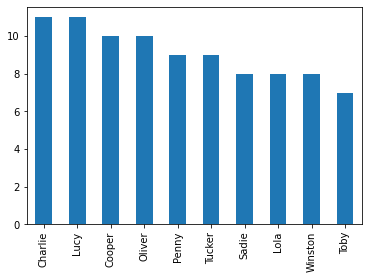

In [67]:
#  get names and counts of dogs with the top counts
df_combined.name.value_counts().sort_values(ascending=False)[:10].plot.bar();

In [68]:
# get number dogs using the different languages on the dataframe
df_combined.lang.value_counts()

en     2075
nl        3
in        2
und       1
eu        1
et        1
Name: lang, dtype: int64

In [69]:
# get number of with the the different number of images
df_combined.img_num.value_counts()

1.0    1679
2.0     189
3.0      59
4.0      30
Name: img_num, dtype: int64

### Insights:
1. The Most used dog name is charlie
2. the most common language used with dogs is charlie 

3.Most dogs a posted with just a single photo

### Visualization

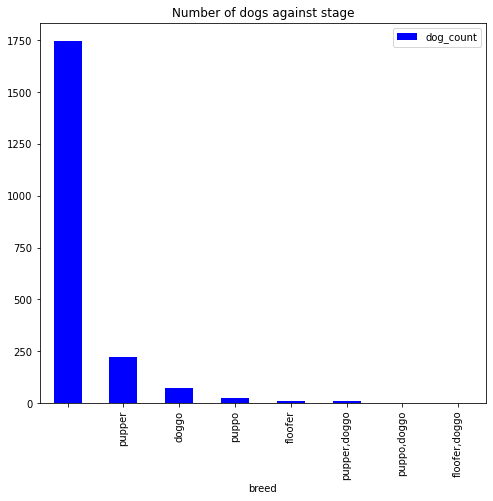

In [70]:
import matplotlib.pyplot as plt
breeds=df_combined['dog_category'].value_counts()
df= pd.DataFrame({'breed':breeds.index, 'dog_count':breeds})
ax = df.plot.bar(x='breed', y='dog_count',color='blue', title='Number of dogs against stage', figsize=(8,7));

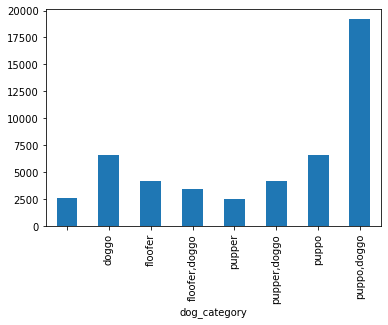

In [71]:
# plot a bar chart for reweet_count for each dog breed
df_combined.groupby('dog_category')['retweet_count'].mean().plot.bar();

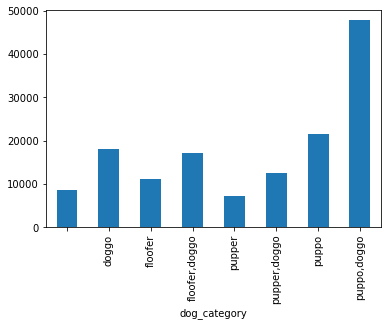

In [72]:
df_combined.groupby('dog_category')['favorite_count'].mean().plot.bar();

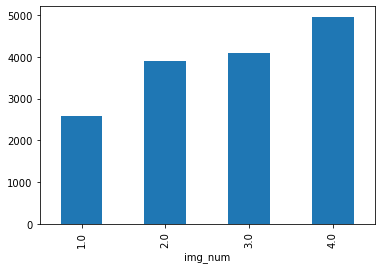

In [73]:
# plot of retweets count agains image number
df_combined.groupby('img_num')['retweet_count'].mean().plot.bar();